# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, I will be working to understand the results of an A/B test run by an e-commerce website. My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
## Part I - Probability



In [99]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)


### 1_1



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [100]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [101]:
df.shape[0]

294478

In [102]:
df.shape[1]

5

**c.** The number of unique users in the dataset.

In [103]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [104]:
proportio_users_converted=df.query('converted == 1').user_id.nunique()/df.user_id.nunique()
print("The proportion of users converted is {0:.2%}".format(proportio_users_converted))

The proportion of users converted is 12.10%


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [105]:
df.query('(group == "control" and landing_page != "old_page" )or(group == "treatment" and landing_page != "new_page" )').user_id.count()

3893

**f.** Do any of the rows have missing values?

In [106]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [107]:
df.isnull().values.any()

False

###  1_2  


**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [108]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')
         

In [109]:
df2.shape[0]

290585

In [110]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

###  1_3  


**a.** How many unique **user_id**s are in **df2**?

In [111]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [112]:
df2[df2.user_id.duplicated( keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [113]:
df2.drop_duplicates(subset=['user_id'])
df2[df2.user_id.duplicated( )]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [114]:
df2.drop_duplicates(subset=['user_id'])
df2[df2.user_id.duplicated( )]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [115]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


###  1_4  


**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>





In [116]:
p_converted =df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
print("The probability is {0: .2%}".format(p_converted))


The probability is  11.96%


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [117]:
converted_controlusers = df2.query('converted == 1 and group =="control" ').user_id.nunique()
control_users= df2.query('group =="control"').user_id.nunique()
cp2=converted_controlusers/control_users
print(" Given that an individual was in the control group, the probability they converted is {0:.2%}".format(cp2))

 Given that an individual was in the control group, the probability they converted is 12.04%


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [118]:
treatment_controlusers = df2.query('converted == 1 and group =="treatment" ').user_id.nunique()
treatment_users= df2.query('group =="treatment"').user_id.nunique()
tp2=treatment_controlusers/treatment_users
print(" Given that an individual was in the control group, the probability they converted is {0:.2%}".format(tp2))

 Given that an individual was in the control group, the probability they converted is 11.88%


In [119]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups. 
obs_diff = cp2 - tp2
print(obs_diff)

0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [120]:
new_page_users2 = df2.query('landing_page == "new_page"').user_id.nunique()
Newpage_p2 = new_page_users2/df2.shape[0]
print("The probability that an individual received the new page is {0:.2%}".format(Newpage_p2))

The probability that an individual received the new page is 50.01%


In [121]:
new_c2 = df2.query('converted == 1 and  landing_page == "new_page"').user_id.nunique()
new_users2 =df2.query('landing_page == "new_page"').user_id.nunique()

print(" Given that an individual was in new landing page, the probability they converted is {0:.2%}".format(new_c2 /new_users2))


 Given that an individual was in new landing page, the probability they converted is 11.88%


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**the answer**

The probability that an individual will convert regardless of which group they belong to is 11.96%.

While the probability of converting in the control group was 12.04%.
While the probability of conversion in the treated group is 11.88%.
Since the probability of users in each group converting is similar, there is no evidence that the new page leads to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

 


###  2_1


If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  



>**the ansser.**

**H0: p_new - p_old <= 0** .


**H1:  p_new - p_old > 0**

###  2.2 - Null Hypothesis $H_0$ Testing




 

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [122]:
p_new = df2.query('landing_page=="new_page"').converted.mean()
p_new

0.11880724790277405

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [123]:
p_old =df2.query('landing_page=="old_page"').converted.mean()
p_old

0.1203863045004612

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [124]:
n_new = df2.query('landing_page=="new_page"').user_id.nunique()
n_new 

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [125]:
n_old = df2.query('landing_page=="old_page"').user_id.nunique() 
n_old 

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis. 


In [126]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1],size =n_new,p=[(1-p_new),p_new]) 
print(new_page_converted.mean())                                     

0.118360745991


**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [127]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1],size =n_old,p=[(1-p_old),p_old]) 
print(old_page_converted.mean())  

0.120702947534


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [128]:
obs_fills = p_new - p_old
obs_fills

-0.0015790565976871451

In [129]:
actual_diffs= df2.query('landing_page == "new_page"').converted.mean()- df2.query('landing_page== "old_page"').converted.mean()
actual_diffs

-0.0015790565976871451


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [130]:
p_diffs = []
np.random.seed(42)
new_converted_simulation = np.random.binomial(n_new, p_new,  10000 )/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



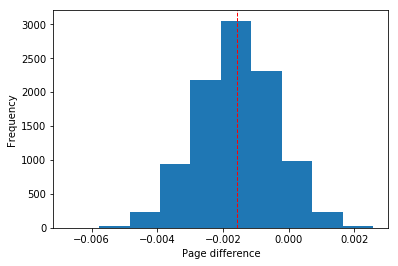

In [131]:
plt.hist(p_diffs)

plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(obs_fills), color='r', linestyle='dashed', linewidth=1, label="Observed difference")
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [132]:
null_vals = np.random.normal(0, p_diffs.std(), 10000)

In [133]:
(null_vals < obs_diff).mean()

0.90759999999999996

**k.** Please explain in words what you have just computed in part **j** above.  
 

**the answer**

The value computed in part j is called "p-value" in scientific studies. The p-value is the probability of getting our statistic (or a more extreme value) if the null is true. When the p-value is large, which in this case, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null. Also the p-value is greater than Type I Error (p-value 0.90 > alpha 0.05), thus we fail to reject the null.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [134]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]

# number of conversions with the new_page
convert_new =  df2.query("landing_page == 'new_page' and converted == 1").shape[0]

# number of individuals who were shown the old_page
n_old = df2.query("landing_page == 'old_page'").shape[0]

# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").shape[0]


convert_old , convert_new ,n_old ,n_new

(17489, 17264, 145274, 145311)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.





---



In [135]:
from scipy.stats import norm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

z_score, norm.ppf(1-(0.05/2)), p_value

(-1.3116075339133115, 1.959963984540054, 0.90517370514059103)

z-Score is the number of standard deviations from the mean of the data point. But technically, it is a measure of the number of standard deviations below or above the content which means that the raw score is

The p-value is the probability of getting our statistic (or a more extreme value) if the null is true. When the probability value is large, which in this case, we have evidence that our statistics are likely to come from the null hypothesis. So we have no evidence of refusal of nullity.

In [136]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score)
print(p_value)

1.31160753391
0.905173705141


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



>**the answer.**

z-Score is the number of standard deviations from the mean of the data point. But technically, it is a measure of the number of standard deviations below or above the content which means that the raw score is

The p-value is the probability of getting our statistic (or a more extreme value) if the null is true. When the probability value is large, which in this case, we have evidence that our statistics are likely to come from the null hypothesis.

So we have no evidence of refusal of nullity.

<a id='regression'></a>
### Part III - A regression approach

###  3_1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**the answer.**


Logistic Regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [137]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [138]:
#create a colun for the intercept
df2['intercept'] = 1


df2[['control','treatment']] = pd .get_dummies(df2['group'])
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])

df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [139]:
logist = sm.Logit(df2['converted'], df2[['intercept','treatment']])
result = logist.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [140]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-20 20:23 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  




>**the answer.**

Whereas the hypothesis says:

H0: b1 = 0

H1 :b1 ≠ 0

Since the p-value > 0.05, we reject the counting hypothesis and accept the alternative hypothesis

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**the answer.**

Another factor could be time. We can check whether the conversion depends on a certain time of the day or a certain day when the user is browsing the site. For the timestamp variable, we can also convert the time to 'morning, afternoon, evening', or 'weekdays and weekends'.
Not being able to add additional terms to the regression model is that it will make interpretation of the model more complex
 .

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 




In [141]:
# Read the countries.csv
ather_df = pd.read_csv('countries.csv')
ather_df.head() , ather_df.country.unique()

(   user_id country
 0   834778      UK
 1   928468      US
 2   822059      UK
 3   711597      UK
 4   710616      UK, array(['UK', 'US', 'CA'], dtype=object))

In [142]:
# Join with the df2 dataframe
df3 = df2.merge(ather_df, on ='user_id', how='left')
df3.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US


In [143]:
# Create the necessary dummy variables
df3[['UK', 'US', 'CA']]= pd.get_dummies(df3['country'])
df3.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,country,UK,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US,0,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 



In [144]:
# Fit your model, and summarize the results
logist2 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])
result2 = logist2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-20 20:24 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
new_page     -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
UK           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
US            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
==================================================================

"""

In [147]:
1/np.exp(result2.params)

intercept    7.310219
new_page     1.015064
UK           1.041593
US           0.990160
dtype: float64

In [148]:
np.exp(result2.params)

intercept    0.136795
new_page     0.985160
UK           0.960068
US           1.009938
dtype: float64

>**the answer.**

Interpreting Result:

For every unit for new_page decrease, convert will be 98.5% more likely to happen, holding all other varible constant.

For every unit for UK decrease, convert is 96.0% more to happen, holding all other varible constant.

For every unit for US increases, convert is 99.3% more to happen, holding all other varible constant.


In [160]:
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']
lm3 = sm.Logit(df3['converted'], df3[['intercept', 'new_page', 'UK' , 'US', 'UK_new_page', 'US_new_page']])
result3 = lm3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-20 21:39 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
new_page     -0.0206    0.0137    -1.5060  0.1321  -0.0474   0.0062
UK           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
US           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
UK_new_page  -0.0469    0.0538    -0.8716  0.3834  -0.1523   0.0585
US_new_page   0.0314    0.0266     1.1811  0.2375  -0.0207   0.0835
==================================================================

"""

In [161]:
np.exp(result3.params)

intercept      0.137178
new_page       0.979636
UK             0.982625
US             0.994272
UK_new_page    0.954208
US_new_page    1.031907
dtype: float64

In [162]:
1/np.exp(result3.params)

intercept      7.289813
new_page       1.020788
UK             1.017682
US             1.005761
UK_new_page    1.047989
US_new_page    0.969079
dtype: float64

Interpreting Result:

From the above Logit Regression Results, we can see the coefficient of intereaction variable "UK_new_page" and "US_new_page" are different from the coefficient of new_page itself.

Also,only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. Other varable in the summary are not statistically significant. Additionally, Z-score for all X variables are not large enough to be significant for predicting converted rate.

Therefore, the country a user lives is not significant on the converted rate considering the page the user land in.

Interpreting Result:

For every unit for new_page decreases, convert will be 1.02 more likely to happen, holding all other varible constant.

Convert is 1.04 times more likely to happen for UK and new page users than CA and new page users, holding all other varible consta6t.

Convert is 1.03  times more likely to happen for US and new page users than CA and new page users, holding all other varible consta2t.

Convert is 1.06 % more likely to happen for the users in UK than CA, holding all other varible constant.

Convert is 1.0 % more likely to happen for the users in US than CA, holding all other varible constant.



In [171]:
#Import sklearn model to split, test and score data,and fit data model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [172]:
x = df3[['new_page','UK_new_page','US_new_page','UK','US']]
y = df3['converted']
        
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [173]:

lm =LogisticRegression()
# fit the train data
lm.fit(X_train,y_train) 
print(lm.score(X_test,y_test))

0.883650504147


The result is a large reuslt, which means that the page and country dataset is suitable for the pre-conversion rate.

In [174]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0